## Is NYCT_4588 on Schedule??
# If not, how much delay is expected?
# On what days are the delay expected?
# which hours of the day delay is expected?


In [94]:
import pandas
import pandas as pd
import numpy as np
import geopandas
import matplotlib.pyplot as plt
import seaborn as sns
import descartes

import geopandas as gpd
from shapely.geometry import Point, Polygon
%matplotlib inline


In [95]:
df = pd.read_csv("MTA-1706.csv")

C:\Users\Suhasini\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (14,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [96]:
print("The dataframe has :",len(df), "  rows")

The dataframe has : 1048575   rows


In [97]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 18 columns):
RecordedAtTime               1048575 non-null object
DirectionRef                 1048575 non-null int64
PublishedLineName            1048575 non-null object
OriginName                   1040112 non-null object
OriginLat                    1040112 non-null float64
OriginLong                   1040112 non-null float64
DestinationName              1048575 non-null object
DestinationLat               1047329 non-null float64
DestinationLong              1047329 non-null float64
VehicleRef                   1048575 non-null object
VehicleLocation.Latitude     1048575 non-null float64
VehicleLocation.Longitude    1048575 non-null float64
NextStopPointName            1047439 non-null object
ArrivalProximityText         1047439 non-null object
DistanceFromStop             1047439 non-null object
ExpectedArrivalTime          931342 non-null object
ScheduledArrivalTime         102290

In [98]:
pandas.set_option('display.max_columns',None)
df.head(5)

,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,VehicleRef,VehicleLocation.Latitude,VehicleLocation.Longitude,NextStopPointName,ArrivalProximityText,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime,Unnamed: 17
0,6/1/2017 0:03,0,B8,4 AV/95 ST,40.616104,-74.031143,BROWNSVILLE ROCKAWAY AV,40.656048,-73.907379,NYCT_430,40.635170,-73.960803,FOSTER AV/E 18 ST,approaching,76,6/1/2017 0:03,24:06:14,NaN
1,6/1/2017 0:03,1,S61,ST GEORGE FERRY/S61 & S91,40.643169,-74.073494,S I MALL YUKON AV,40.575935,-74.167686,NYCT_8263,40.590802,-74.158340,MERRYMOUNT ST/TRAVIS AV,approaching,62,6/1/2017 0:03,23:58:02,NaN
2,6/1/2017 0:03,0,Bx10,E 206 ST/BAINBRIDGE AV,40.875008,-73.880142,RIVERDALE 263 ST,40.912376,-73.902534,NYCT_4223,40.886010,-73.912647,HENRY HUDSON PKY E/W 235 ST,at stop,5,6/1/2017 0:03,24:00:53,NaN
3,6/1/2017 0:03,0,Q5,TEARDROP/LAYOVER,40.701748,-73.802399,ROSEDALE LIRR STA via MERRICK,40.666012,-73.735939,NYCT_8422,40.668002,-73.729348,HOOK CREEK BL/SUNRISE HY,< 1 stop away,267,6/1/2017 0:04,24:03:00,NaN
4,6/1/2017 0:03,1,Bx1,RIVERDALE AV/W 231 ST,40.881187,-73.909340,MOTT HAVEN 136 ST via CONCOURSE,40.809654,-73.928360,NYCT_4710,40.868134,-73.893032,GRAND CONCOURSE/E 196 ST,at stop,11,6/1/2017 0:03,23:59:38,NaN


In [99]:
print("there are 305 bus # 's ")

there are 305 bus # 's 


### is B6 running on schedule??? 

In [147]:
B6 = df[df.PublishedLineName == 'B6']

In [148]:
B6.columns

Index(['RecordedAtTime', 'DirectionRef', 'PublishedLineName', 'OriginName',
       'OriginLat', 'OriginLong', 'DestinationName', 'DestinationLat',
       'DestinationLong', 'VehicleRef', 'VehicleLocation.Latitude',
       'VehicleLocation.Longitude', 'NextStopPointName',
       'ArrivalProximityText', 'DistanceFromStop', 'ExpectedArrivalTime',
       'ScheduledArrivalTime', 'Unnamed: 17'],
      dtype='object')

In [149]:
B6.drop(['Unnamed: 17'], axis=1,inplace=True)
#gapminder_ocean.drop(['pop'], axis=1)

C:\Users\Suhasini\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [103]:
B6.head(5)

,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,VehicleRef,VehicleLocation.Latitude,VehicleLocation.Longitude,NextStopPointName,ArrivalProximityText,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime
20,6/1/2017 0:03,0,B6,HARWAY AV/BAY 37 ST,40.593510,-73.993996,EAST NY NEW LOTS STA,40.666420,-73.883385,NYCT_7158,40.645676,-73.901474,GLENWOOD RD/E 98 ST,at stop,4,6/1/2017 0:03,24:05:00
91,6/1/2017 0:03,1,B6,LIVONIA AV/ASHFORD ST,40.666382,-73.883614,BENSONHURST HARWAY AV,40.592949,-73.993385,NYCT_4989,40.666288,-73.883834,ASHFORD ST/NEW LOTS AV,< 1 stop away,158,6/1/2017 0:03,24:04:27
191,6/1/2017 0:03,1,B6,LIVONIA AV/ASHFORD ST,40.666382,-73.883614,BENSONHURST HARWAY AV,40.592949,-73.993385,NYCT_4861,40.642107,-73.903071,FLATLANDS AV/E 94 ST,at stop,11,6/1/2017 0:03,23:49:19
221,6/1/2017 0:03,0,B6,HARWAY AV/BAY 37 ST,40.593510,-73.993996,EAST NY NEW LOTS STA,40.666420,-73.883385,NYCT_7151,40.633125,-73.923898,AV H/E 56 ST,approaching,143,6/1/2017 0:04,24:05:48
294,6/1/2017 0:03,1,B6,LIVONIA AV/ASHFORD ST,40.666382,-73.883614,BENSONHURST HARWAY AV,40.592949,-73.993385,NYCT_7174,40.626191,-73.952191,AV J/E 23 ST,approaching,144,6/1/2017 0:04,24:05:08


In [24]:
B6.OriginName.value_counts()

HARWAY AV/BAY 37 ST                  8835
LIVONIA AV/ASHFORD ST                6676
ROCKAWAY STATION/ROCKAWAY STATION    3400
AV J/CONEY ISLAND AV                  523
BEDFORD AV/CAMPUS ROAD                188
FLATLANDS AV/ELTON ST                  31
FLATLANDS AV/E 82 ST                   21
E 45 ST\GLENWOOD RD                    15
BAY PY/60 ST                            9
Name: OriginName, dtype: int64

In [25]:
B6.DestinationName.value_counts()

LTD BENSONHURST HARWAY AV    5312
BENSONHURST HARWAY AV        4688
LTD EAST NY NEW LOTS STA     4674
ROCK PKY STA                 3398
EAST NY NEW LOTS STA         1367
AVENUE J CONEY IS AV          386
Name: DestinationName, dtype: int64

In [35]:
routes_df_geo = [Point(x, y) for x, y in zip(B6.OriginLong, B6.OriginLat)]
gdf = geopandas.GeoDataFrame(B6,geometry=routes_df_geo)

In [36]:
print(gdf.head(7))

    RecordedAtTime  DirectionRef PublishedLineName             OriginName  \
20   6/1/2017 0:03             0                B6    HARWAY AV/BAY 37 ST   
91   6/1/2017 0:03             1                B6  LIVONIA AV/ASHFORD ST   
191  6/1/2017 0:03             1                B6  LIVONIA AV/ASHFORD ST   
221  6/1/2017 0:03             0                B6    HARWAY AV/BAY 37 ST   
294  6/1/2017 0:03             1                B6  LIVONIA AV/ASHFORD ST   
297  6/1/2017 0:03             1                B6  LIVONIA AV/ASHFORD ST   
493  6/1/2017 0:03             1                B6  LIVONIA AV/ASHFORD ST   

     OriginLat  OriginLong        DestinationName  DestinationLat  \
20   40.593510  -73.993996   EAST NY NEW LOTS STA       40.666420   
91   40.666382  -73.883614  BENSONHURST HARWAY AV       40.592949   
191  40.666382  -73.883614  BENSONHURST HARWAY AV       40.592949   
221  40.593510  -73.993996   EAST NY NEW LOTS STA       40.666420   
294  40.666382  -73.883614  BENSONHURS

In [38]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [59]:
world[world.name == 'United States'] 

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
168,313973000.0,North America,United States,USA,15094000.0,"(POLYGON ((-155.54211 19.08348000000001, -155...."


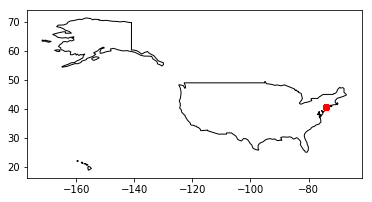

In [60]:
# We restrict to South America.
ax = world[world.name == 'United States'].plot(
    color='white', edgecolor='black')
# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red', figsize = (10,20))
plt.show();



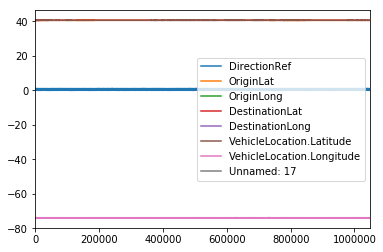

In [61]:
B6.plot()

In [71]:
df.columns

Index(['RecordedAtTime', 'DirectionRef', 'PublishedLineName', 'OriginName',
       'OriginLat', 'OriginLong', 'DestinationName', 'DestinationLat',
       'DestinationLong', 'VehicleRef', 'VehicleLocation.Latitude',
       'VehicleLocation.Longitude', 'NextStopPointName',
       'ArrivalProximityText', 'DistanceFromStop', 'ExpectedArrivalTime',
       'ScheduledArrivalTime', 'Unnamed: 17'],
      dtype='object')

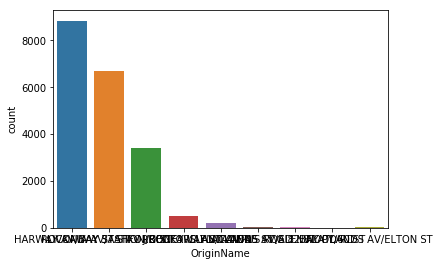

HARWAY AV/BAY 37 ST                  8835
LIVONIA AV/ASHFORD ST                6676
ROCKAWAY STATION/ROCKAWAY STATION    3400
AV J/CONEY ISLAND AV                  523
BEDFORD AV/CAMPUS ROAD                188
FLATLANDS AV/ELTON ST                  31
FLATLANDS AV/E 82 ST                   21
E 45 ST\GLENWOOD RD                    15
BAY PY/60 ST                            9
Name: OriginName, dtype: int64

In [78]:
sns.countplot(x='OriginName',data=B6);  ####  the employee attrition is 
plt.show()
B6.OriginName.value_counts()


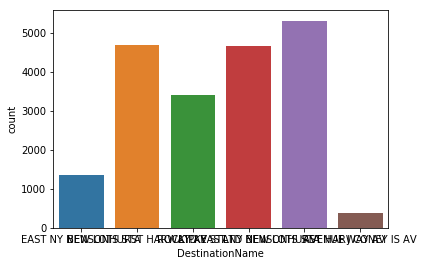

LTD BENSONHURST HARWAY AV    5312
BENSONHURST HARWAY AV        4688
LTD EAST NY NEW LOTS STA     4674
ROCK PKY STA                 3398
EAST NY NEW LOTS STA         1367
AVENUE J CONEY IS AV          386
Name: DestinationName, dtype: int64

In [81]:
sns.countplot(x='DestinationName',data=B6);  ####  the employee attrition is 
plt.show()
B6.DestinationName.value_counts()


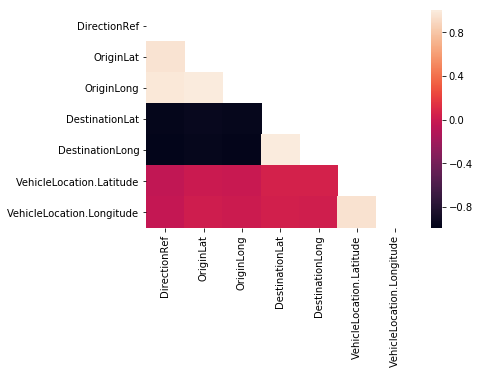

In [82]:
### see the correlation among features using correlation matrix
corr = B6.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr,mask = mask,
           xticklabels = corr.columns.values,
           yticklabels = corr.columns.values);

In [158]:
## Convert Recordedattime to Datetime obj 
B6.RecordedAtTime = pd.to_datetime(B6.RecordedAtTime)
time_mask = (B6['RecordedAtTime'].dt.hour >= 3) & (B6['RecordedAtTime'].dt.hour < 23)

C:\Users\Suhasini\Anaconda3\lib\site-packages\pandas\core\generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [162]:
B6 = B6[time_mask] ## exclude midnight hours

C:\Users\Suhasini\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [164]:
len(B6)

18862

In [166]:
## convert expected and scheduled time to date time objects
B6.ExpectedArrivalTime = pd.to_datetime(B6.ExpectedArrivalTime)
B6.ScheduledArrivalTime = pd.to_datetime(B6.ScheduledArrivalTime)

In [171]:
## Calculate delay in seconds then add it as another column in m_101
expected_hours  = B6.ExpectedArrivalTime.dt.hour
expected_minutes = B6.ExpectedArrivalTime.dt.minute
expected_seconds = B6.ExpectedArrivalTime.dt.second




In [172]:
scheduled_hours = B6.ScheduledArrivalTime.dt.hour
scheduled_minutes = B6.ScheduledArrivalTime.dt.minute
scheduled_seconds = B6.ScheduledArrivalTime.dt.second

In [ ]:
m_101$VehicleDelay <- 3600 * (expected_hours - scheduled_hours) +
                      60 * (expected_minutes - scheduled_minutes) +
                      (expected_seconds - scheduled_seconds)

In [176]:
B6['VehicleDelay'] = 3600 *(expected_hours - scheduled_hours) +60 * (expected_minutes - scheduled_minutes) +(expected_seconds - scheduled_seconds)

In [183]:
B6['day_of_week'] = B6['RecordedAtTime'].dt.weekday_name


In [197]:
B6.head(4)

,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,VehicleRef,VehicleLocation.Latitude,VehicleLocation.Longitude,NextStopPointName,ArrivalProximityText,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime,VehicleDelay,day_of_week,MeanDelay
7040,2017-06-01 03:03:00,1,B6,LIVONIA AV/ASHFORD ST,40.666382,-73.883614,BENSONHURST HARWAY AV,40.592949,-73.993385,NYCT_7186,40.632639,-73.952826,BEDFORD AV/CAMPUS ROAD,approaching,74,2017-06-01 03:03:00,2020-01-11 03:02:27,33.0,Thursday,NaN
7041,2017-06-01 03:03:00,1,B6,LIVONIA AV/ASHFORD ST,40.666382,-73.883614,BENSONHURST HARWAY AV,40.592949,-73.993385,NYCT_7186,40.632639,-73.952826,BEDFORD AV/CAMPUS ROAD,approaching,74,2017-06-01 03:03:00,2020-01-11 03:00:27,153.0,Thursday,NaN
7115,2017-06-01 03:03:00,0,B6,HARWAY AV/BAY 37 ST,40.593510,-73.993996,EAST NY NEW LOTS STA,40.666420,-73.883385,NYCT_7145,40.596991,-73.998363,CROPSEY AV/BAY 31 ST,at stop,0,2017-06-01 03:03:00,2020-01-11 03:01:14,106.0,Thursday,NaN
7139,2017-06-01 03:03:00,0,B6,HARWAY AV/BAY 37 ST,40.593510,-73.993996,EAST NY NEW LOTS STA,40.666420,-73.883385,NYCT_7162,40.632994,-73.925987,AV H/E 52 ST,at stop,0,NaT,2020-01-11 02:58:44,NaN,Thursday,NaN


In [200]:
###### df.groupby('A')['B'].mean()

B6.groupby('day_of_week')['VehicleDelay'].mean()

day_of_week
Friday      188.340616
Monday      151.415803
Saturday    317.820737
Sunday      304.326864
Thursday     37.748325
Name: VehicleDelay, dtype: float64

In [201]:
B6.groupby('VehicleRef')['VehicleDelay'].mean()

VehicleRef
NYCT_4855     20.657459
NYCT_4856     63.513333
NYCT_4857     75.613636
NYCT_4858     13.693467
NYCT_4860    138.852941
NYCT_4861     57.028302
NYCT_4862    -31.929688
NYCT_4863     77.889831
NYCT_4865    133.405063
NYCT_4866     49.481203
NYCT_4867    207.870588
NYCT_4868    171.481481
NYCT_4869    103.327684
NYCT_4870    -50.000000
NYCT_4871     60.358491
NYCT_4872    -42.020833
NYCT_4873    380.333333
NYCT_4874    153.855204
NYCT_4876    113.009091
NYCT_4877     90.831325
NYCT_4878     23.393103
NYCT_4879    159.576271
NYCT_4880    228.146497
NYCT_4881     86.571429
NYCT_4882    492.181818
NYCT_4885    180.850649
NYCT_4886    284.650000
NYCT_4887     77.275862
NYCT_4888     11.932203
NYCT_4889     59.702703
                ...    
NYCT_7163    263.780142
NYCT_7164    194.350427
NYCT_7165    166.017094
NYCT_7166    338.675676
NYCT_7167    213.646341
NYCT_7168    287.826733
NYCT_7169    129.232804
NYCT_7170     28.185484
NYCT_7171    224.736842
NYCT_7172    137.425414
NYCT_

In [ ]:
summary.df <- m_101 %>% 
        group_by(weekdays(RecordedAtTime), hours(RecordedAtTime)) %>% 
        summarise(mean(VehicleDelay, na.rm = TRUE)) %>%
        ungroup
        
        


In [212]:
B6.groupby('day_of_week').count()

,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,VehicleRef,VehicleLocation.Latitude,VehicleLocation.Longitude,NextStopPointName,ArrivalProximityText,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime,VehicleDelay,MeanDelay
day_of_week,,,,,,,,,,,,,,,,,,,
Friday,4592,4592,4592,4592,4592,4592,4592,4592,4592,4592,4592,4592,4582,4582,4582,4028,4537,4028,0
Monday,4156,4156,4156,4156,4156,4156,4156,4156,4156,4156,4156,4156,4152,4152,4152,3569,4091,3569,0
Saturday,3153,3153,3153,3122,3122,3122,3153,3153,3153,3153,3153,3153,3148,3148,3148,2765,3080,2739,0
Sunday,2276,2276,2276,2225,2225,2225,2276,2276,2276,2276,2276,2276,2273,2273,2273,2006,2183,1958,0
Thursday,4685,4685,4685,4640,4640,4640,4685,4685,4685,4685,4685,4685,4680,4680,4680,4069,4541,4029,0


In [213]:
B6.head(4)

,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,VehicleRef,VehicleLocation.Latitude,VehicleLocation.Longitude,NextStopPointName,ArrivalProximityText,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime,VehicleDelay,day_of_week,MeanDelay
7040,2017-06-01 03:03:00,1,B6,LIVONIA AV/ASHFORD ST,40.666382,-73.883614,BENSONHURST HARWAY AV,40.592949,-73.993385,NYCT_7186,40.632639,-73.952826,BEDFORD AV/CAMPUS ROAD,approaching,74,2017-06-01 03:03:00,2020-01-11 03:02:27,33.0,Thursday,NaN
7041,2017-06-01 03:03:00,1,B6,LIVONIA AV/ASHFORD ST,40.666382,-73.883614,BENSONHURST HARWAY AV,40.592949,-73.993385,NYCT_7186,40.632639,-73.952826,BEDFORD AV/CAMPUS ROAD,approaching,74,2017-06-01 03:03:00,2020-01-11 03:00:27,153.0,Thursday,NaN
7115,2017-06-01 03:03:00,0,B6,HARWAY AV/BAY 37 ST,40.593510,-73.993996,EAST NY NEW LOTS STA,40.666420,-73.883385,NYCT_7145,40.596991,-73.998363,CROPSEY AV/BAY 31 ST,at stop,0,2017-06-01 03:03:00,2020-01-11 03:01:14,106.0,Thursday,NaN
7139,2017-06-01 03:03:00,0,B6,HARWAY AV/BAY 37 ST,40.593510,-73.993996,EAST NY NEW LOTS STA,40.666420,-73.883385,NYCT_7162,40.632994,-73.925987,AV H/E 52 ST,at stop,0,NaT,2020-01-11 02:58:44,NaN,Thursday,NaN
